In [1]:
# Import required modules and functions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
from IPython.display import clear_output
import random
from faker import Faker

# setting for plotting for the rest of the notebook
sns.set_theme(style="whitegrid", font_scale=1.5,
              rc={'figure.figsize' : (15, 5)})

In [2]:
# listing all the csv files
!ls ../data/*.csv

../data/friday.csv    ../data/thursday.csv  ../data/wednesday.csv
../data/monday.csv    ../data/tuesday.csv


In [3]:
# checking the head of each csv file
!head ../data/*.csv

==> ../data/friday.csv <==
timestamp;customer_no;location
2019-09-06 07:00:00;1;dairy
2019-09-06 07:00:00;2;drinks
2019-09-06 07:00:00;3;fruit
2019-09-06 07:01:00;2;checkout
2019-09-06 07:01:00;4;drinks
2019-09-06 07:01:00;5;dairy
2019-09-06 07:02:00;4;checkout
2019-09-06 07:02:00;6;spices
2019-09-06 07:02:00;7;dairy

==> ../data/monday.csv <==
timestamp;customer_no;location
2019-09-02 07:03:00;1;dairy
2019-09-02 07:03:00;2;dairy
2019-09-02 07:04:00;3;dairy
2019-09-02 07:04:00;4;dairy
2019-09-02 07:04:00;5;spices
2019-09-02 07:04:00;6;spices
2019-09-02 07:04:00;7;spices
2019-09-02 07:04:00;8;fruit
2019-09-02 07:05:00;1;checkout

==> ../data/thursday.csv <==
timestamp;customer_no;location
2019-09-05 07:00:00;1;drinks
2019-09-05 07:01:00;2;fruit
2019-09-05 07:01:00;3;dairy
2019-09-05 07:01:00;4;dairy
2019-09-05 07:02:00;1;checkout
2019-09-05 07:02:00;4;checkout
2019-09-05 07:03:00;5;dairy
2019-09-05 07:04:00;6;dairy
2019-09-05 07:04:00;7;fruit

==> ../data/tuesday.csv <==
timestamp;custo

# Explorative data analysis of a single file

## Load and format data

In [4]:
# Load all csv-files in data folder
files = !ls ../data/*.csv
start = True
for f in files:
    df = pd.read_csv(f, sep=';')
    if start:
        df_all = df
        start = False
    else:
        df_all = pd.concat([df_all, df], ignore_index=True)
df = df_all
df

,timestamp,customer_no,location
0,2019-09-06 07:00:00,1,dairy
1,2019-09-06 07:00:00,2,drinks
2,2019-09-06 07:00:00,3,fruit
3,2019-09-06 07:01:00,2,checkout
4,2019-09-06 07:01:00,4,drinks
...,...,...,...
24872,2019-09-04 21:48:00,1528,spices
24873,2019-09-04 21:49:00,1520,dairy
24874,2019-09-04 21:49:00,1529,dairy
24875,2019-09-04 21:49:00,1530,fruit


In [5]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24877 entries, 0 to 24876
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   customer_no  24877 non-null  int64 
 2   location     24877 non-null  object
dtypes: int64(1), object(2)
memory usage: 583.2+ KB


In [6]:
# Adjust datatype of columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['location'] = df['location'].astype(str)

In [7]:
# Define unique customer_no
df['customer_no'] = [f"{t.isoweekday()}_{c}" for i, t, c in df[['timestamp', 'customer_no']].itertuples()]

In [8]:
# Sort by timestamp
df = df.sort_values('timestamp')

In [9]:
df

,timestamp,customer_no,location
5125,2019-09-02 07:03:00,1_1,dairy
5126,2019-09-02 07:03:00,1_2,dairy
5127,2019-09-02 07:04:00,1_3,dairy
5128,2019-09-02 07:04:00,1_4,dairy
5129,2019-09-02 07:04:00,1_5,spices
...,...,...,...
5123,2019-09-06 21:50:00,5_1509,drinks
5121,2019-09-06 21:50:00,5_1507,checkout
5122,2019-09-06 21:50:00,5_1508,checkout
5119,2019-09-06 21:50:00,5_1496,fruit


## Further process data

In [10]:
### Add previous location and steps

In [11]:
state_dct = {}

def get_prv_location(df):
    df = df.copy()
    for idx, customer in df[['customer_no']].itertuples():
        df.loc[idx, 'prv_location'] = state_dct.get(customer, ['entrance', 0])[0]
        df.loc[idx, 'step'] = state_dct.get(customer, ['entrance', 0])[1] + 1
        state_dct[customer] = [df.loc[idx, 'location'], df.loc[idx, 'step']]
    return df

df = get_prv_location(df)
df.head(10)

,timestamp,customer_no,location,prv_location,step
5125,2019-09-02 07:03:00,1_1,dairy,entrance,1.0
5126,2019-09-02 07:03:00,1_2,dairy,entrance,1.0
5127,2019-09-02 07:04:00,1_3,dairy,entrance,1.0
5128,2019-09-02 07:04:00,1_4,dairy,entrance,1.0
5129,2019-09-02 07:04:00,1_5,spices,entrance,1.0
5130,2019-09-02 07:04:00,1_6,spices,entrance,1.0
5131,2019-09-02 07:04:00,1_7,spices,entrance,1.0
5132,2019-09-02 07:04:00,1_8,fruit,entrance,1.0
5133,2019-09-02 07:05:00,1_1,checkout,dairy,2.0
5134,2019-09-02 07:05:00,1_5,checkout,spices,2.0


### Derive counts per location

In [12]:
def get_count_per_loc(df):
    df = df.copy()
    for loc in df['location'].unique():
        for idx, cur_loc, prv_loc in df[['location', 'prv_location']].itertuples():
            df.loc[idx, loc] = 0
            if cur_loc == loc:
                df.loc[idx, loc] = 1
            if prv_loc == loc:
                df.loc[idx, loc] = -1
    
    return df

df = get_count_per_loc(df)
df.head(10)

,timestamp,customer_no,location,prv_location,step,dairy,spices,fruit,checkout,drinks
5125,2019-09-02 07:03:00,1_1,dairy,entrance,1.0,1.0,0.0,0.0,0.0,0.0
5126,2019-09-02 07:03:00,1_2,dairy,entrance,1.0,1.0,0.0,0.0,0.0,0.0
5127,2019-09-02 07:04:00,1_3,dairy,entrance,1.0,1.0,0.0,0.0,0.0,0.0
5128,2019-09-02 07:04:00,1_4,dairy,entrance,1.0,1.0,0.0,0.0,0.0,0.0
5129,2019-09-02 07:04:00,1_5,spices,entrance,1.0,0.0,1.0,0.0,0.0,0.0
5130,2019-09-02 07:04:00,1_6,spices,entrance,1.0,0.0,1.0,0.0,0.0,0.0
5131,2019-09-02 07:04:00,1_7,spices,entrance,1.0,0.0,1.0,0.0,0.0,0.0
5132,2019-09-02 07:04:00,1_8,fruit,entrance,1.0,0.0,0.0,1.0,0.0,0.0
5133,2019-09-02 07:05:00,1_1,checkout,dairy,2.0,-1.0,0.0,0.0,1.0,0.0
5134,2019-09-02 07:05:00,1_5,checkout,spices,2.0,0.0,-1.0,0.0,1.0,0.0


### Calculate duration(s) of stay

In [13]:
time_dict = {}

def calc_durations(df):
    df = df.copy()
    for idx, customer, time_now in df[['customer_no', 'timestamp']][::-1].itertuples():
        df.loc[idx, 'duration'] = (time_dict.get(customer, time_now) - time_now).total_seconds() / 60
        time_dict[customer] = time_now
    
    return df

df = calc_durations(df)
df.head(10)

,timestamp,customer_no,location,prv_location,step,dairy,spices,fruit,checkout,drinks,duration
5125,2019-09-02 07:03:00,1_1,dairy,entrance,1.0,1.0,0.0,0.0,0.0,0.0,2.0
5126,2019-09-02 07:03:00,1_2,dairy,entrance,1.0,1.0,0.0,0.0,0.0,0.0,3.0
5127,2019-09-02 07:04:00,1_3,dairy,entrance,1.0,1.0,0.0,0.0,0.0,0.0,2.0
5128,2019-09-02 07:04:00,1_4,dairy,entrance,1.0,1.0,0.0,0.0,0.0,0.0,4.0
5129,2019-09-02 07:04:00,1_5,spices,entrance,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5130,2019-09-02 07:04:00,1_6,spices,entrance,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5131,2019-09-02 07:04:00,1_7,spices,entrance,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5132,2019-09-02 07:04:00,1_8,fruit,entrance,1.0,0.0,0.0,1.0,0.0,0.0,3.0
5133,2019-09-02 07:05:00,1_1,checkout,dairy,2.0,-1.0,0.0,0.0,1.0,0.0,0.0
5134,2019-09-02 07:05:00,1_5,checkout,spices,2.0,0.0,-1.0,0.0,1.0,0.0,0.0


### Derive first section

In [14]:
first_sec_dic = {}
def get_first_section(df):
    df = df.copy()
    for idx, customer in df[['customer_no']].itertuples():
        if first_sec_dic.get(customer, None) == None:
            first_sec_dic[customer] = df.loc[idx, 'location']
        df.loc[idx, 'first_section'] = first_sec_dic[customer]

    return df

df = get_first_section(df)
df.head(10)

,timestamp,customer_no,location,prv_location,step,dairy,spices,fruit,checkout,drinks,duration,first_section
5125,2019-09-02 07:03:00,1_1,dairy,entrance,1.0,1.0,0.0,0.0,0.0,0.0,2.0,dairy
5126,2019-09-02 07:03:00,1_2,dairy,entrance,1.0,1.0,0.0,0.0,0.0,0.0,3.0,dairy
5127,2019-09-02 07:04:00,1_3,dairy,entrance,1.0,1.0,0.0,0.0,0.0,0.0,2.0,dairy
5128,2019-09-02 07:04:00,1_4,dairy,entrance,1.0,1.0,0.0,0.0,0.0,0.0,4.0,dairy
5129,2019-09-02 07:04:00,1_5,spices,entrance,1.0,0.0,1.0,0.0,0.0,0.0,1.0,spices
5130,2019-09-02 07:04:00,1_6,spices,entrance,1.0,0.0,1.0,0.0,0.0,0.0,1.0,spices
5131,2019-09-02 07:04:00,1_7,spices,entrance,1.0,0.0,1.0,0.0,0.0,0.0,1.0,spices
5132,2019-09-02 07:04:00,1_8,fruit,entrance,1.0,0.0,0.0,1.0,0.0,0.0,3.0,fruit
5133,2019-09-02 07:05:00,1_1,checkout,dairy,2.0,-1.0,0.0,0.0,1.0,0.0,0.0,dairy
5134,2019-09-02 07:05:00,1_5,checkout,spices,2.0,0.0,-1.0,0.0,1.0,0.0,0.0,spices


## Visualization

### Customers over time

In [15]:
# Show unique sections of supermarket
df.location.unique()

array(['dairy', 'spices', 'fruit', 'checkout', 'drinks'], dtype=object)

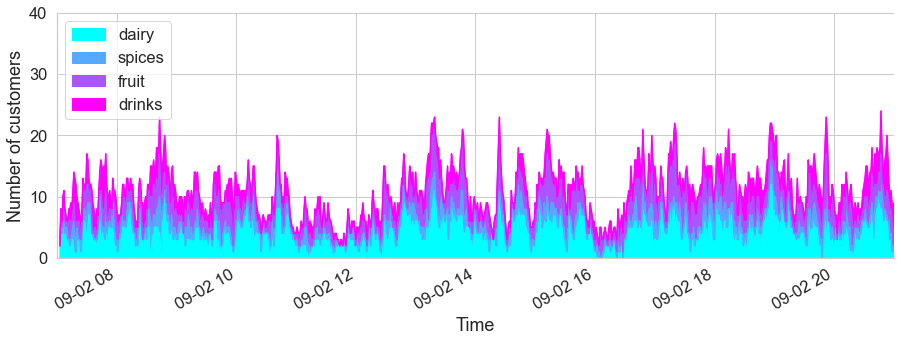

In [16]:
# Show customers per section over the whole day
ax = df.groupby('timestamp')[np.delete(df.location.unique(), 3)].sum().cumsum().plot.area(cmap='cool', legend=True)
ax.set_xlim('2019, 9, 2, 7:00', '2019, 9, 2, 21:00')
plt.ylim(0, 40)
ax.set_xlabel('Time')
ax.set_ylabel('Number of customers')
sns.despine()

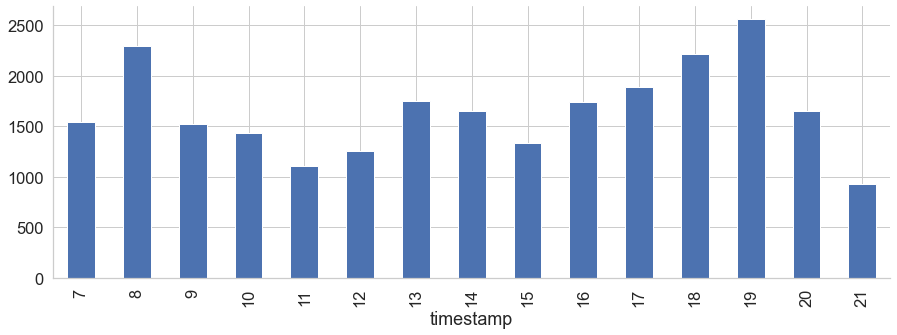

In [17]:
# Show customers per hour over the day (mean)
df.groupby(df['timestamp'].dt.hour)['customer_no'].count().plot.bar()
sns.despine()

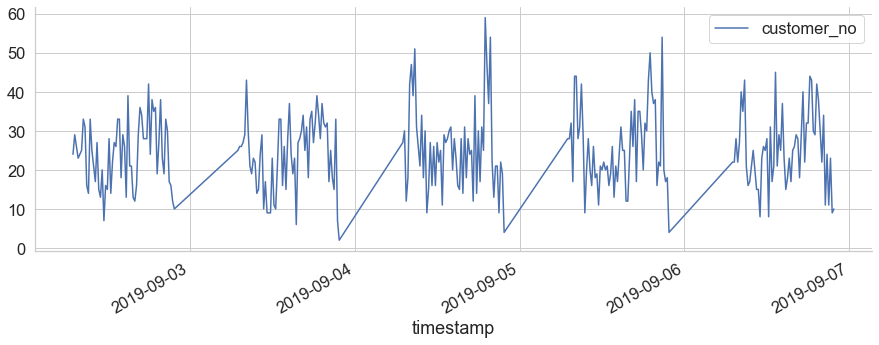

In [18]:
# Show number of newly arrived customers over the week in 15 min intervalls
ax = df[df['step']==1].groupby(df['timestamp'].dt.floor('15Min'))[['customer_no']].count().plot.line() 
#ax.set_xlim('2019, 9, 4, 7:00', '2019, 9, 4, 21:00')
sns.despine()

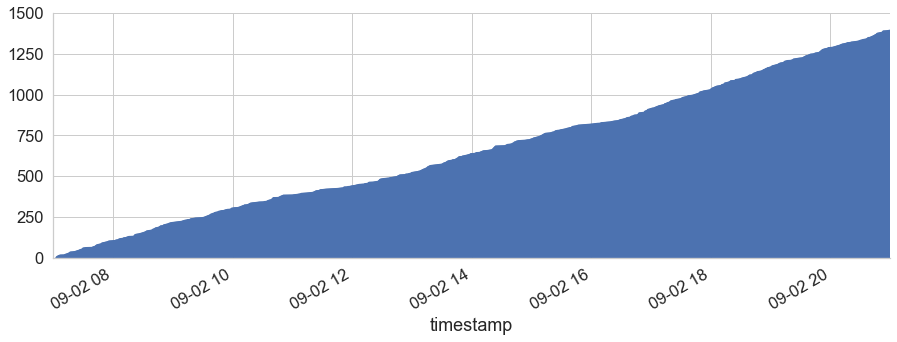

In [19]:
# Cumsum of when new customers arrive -> no clear peks can be observed
ax = df[df['step']==1].groupby('timestamp')['customer_no'].count().cumsum(axis=0).plot.area()
ax.set_xlim('2019, 9, 2, 7:00', '2019, 9, 2, 21:00')
ax.set_ylim(0,1500)
sns.despine()

In [20]:
# Define function for plotting customers per section over time
def plot_cus_per_sec(df, section, start, end):
    """
    Plots number of customers per section for a specific time inetrvall
    """
    ax = df.groupby('timestamp')[section].sum().cumsum().plot.line(legend=True)
    ax.set_xlim(start, end)
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of customers')
    sns.despine()

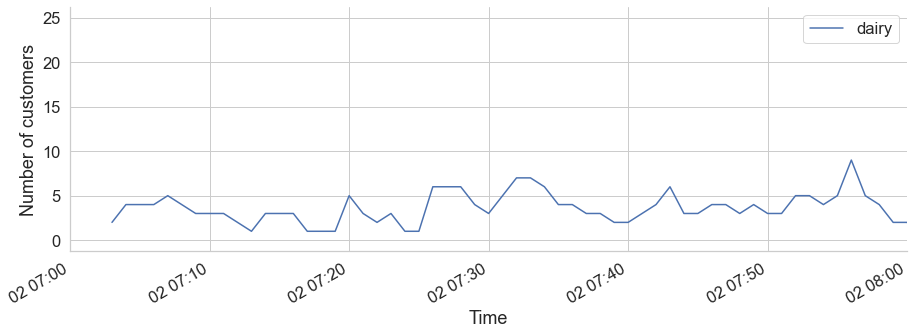

In [21]:
# Show customers in a specific section over time
plot_cus_per_sec(df, 'dairy', '2019, 9, 2, 7:00', '2019, 9, 2, 8:00')

### Duration(s) of stay

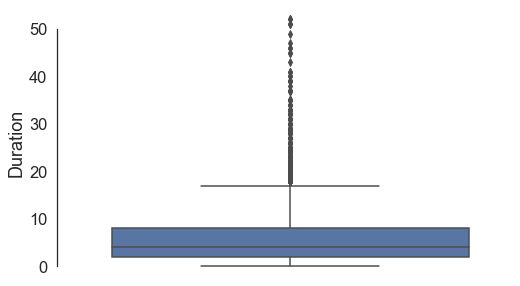

In [22]:
# Boxplot overall duration
with sns.axes_style("white"):  # , {"axes.palette": "pastel"}): # to change palette or other params
    # Draw actual boxplot
    plt.figure(figsize=(8,5))
    bp = sns.boxplot(y=df.groupby('customer_no')['duration'].sum())
    bp.set_ylabel('Duration')
    sns.despine(offset=10, trim=True)

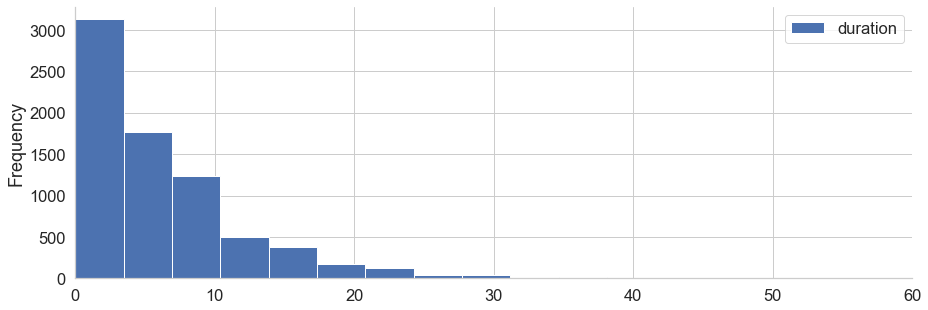

In [23]:
df.groupby('customer_no')[['duration']].sum().sort_values('duration', ascending=False).plot.hist(bins=15)
plt.xlim(0, 60)
sns.despine()

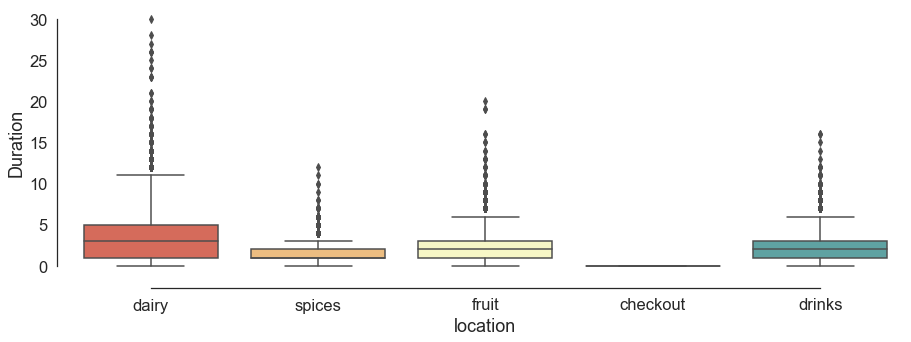

In [24]:
# Boxplot duration per section
with sns.axes_style("white"):  # , {"axes.palette": "pastel"}): # to change palette or other params
    # Draw actual boxplot
    bp = sns.boxplot(x=df['location'] , y=df['duration'], palette="Spectral")
    bp.set_ylabel('Duration')
    sns.despine(offset=10, trim=True)

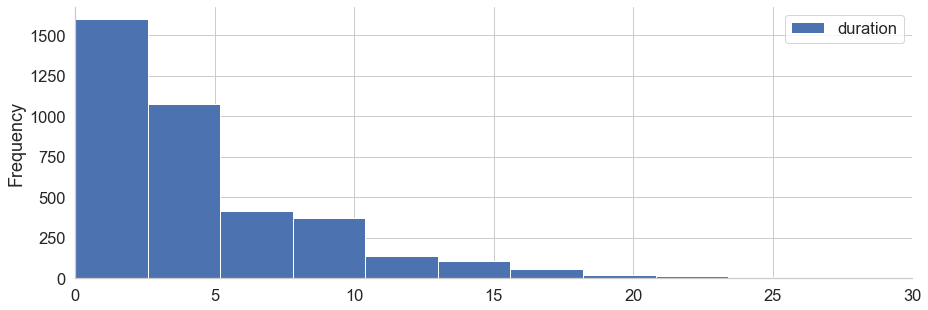

In [25]:
selection = 'dairy'
df[df['location']==selection].groupby('customer_no')[['duration']].sum().sort_values('duration', ascending=False).plot.hist(bins=15)
plt.xlim(0,30)
sns.despine()

### First section vs. following sections

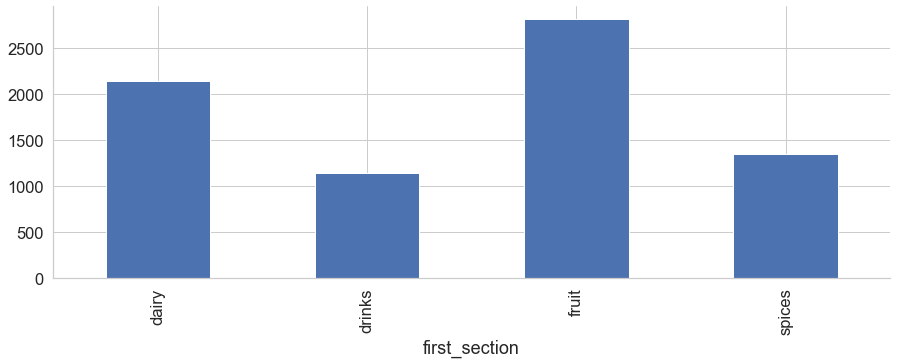

In [26]:
df[df['step']==1].groupby('first_section')['customer_no'].count().plot.bar()
sns.despine()

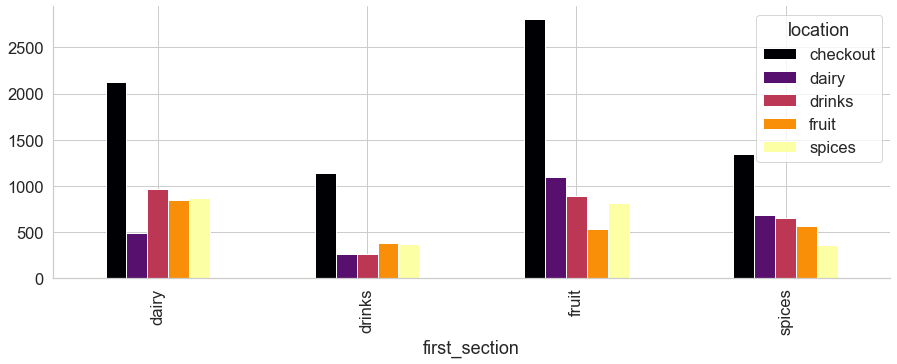

In [27]:
df[df['step']!=1].groupby(['first_section', 'location'])['customer_no'].count().unstack().plot.bar(cmap='inferno')
sns.despine()

# Monte Carlo Simulation of Markov process

## Determine the transition matrix

In [28]:
# Define function to plot heatmap of transition matrix
def plot_heatmap(df):
    with sns.axes_style("white"):
        plt.figure(figsize=(8,8))
        data = df
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        ax = sns.heatmap(data, cmap=cmap, square=True, annot=True)
        sns.despine()
        plt.show()

In [29]:
# Option 1: Derive coefficient of markov/transition matrix using crosstab (no transitions within same state here)
def get_matrix_trs(df):
    # Use crosstab to generate matrix
    df_markov = pd.crosstab(df['prv_location'], df['location'], normalize=0)
    # Add column for state == 'entrance'
    df_markov['entrance'] = float(0)
    # Add row for state == 'checkout'
    df_markov.loc['checkout', :] = float(0)
    df_markov.loc['checkout', 'checkout'] = 1
    # Reorder columns
    col_names = ['entrance', 'dairy', 'spices', 'fruit', 'drinks', 'checkout']
    df_markov = df_markov[col_names].reindex(col_names)
    # Return matrix
    return  df_markov, df_markov.values, df_markov.index

df_markov, matrix_trs, locations = get_matrix_trs(df)

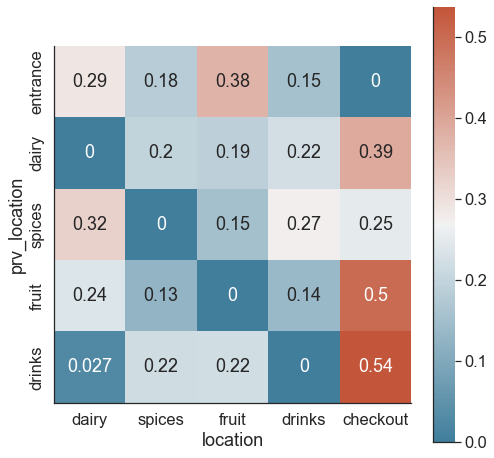

In [30]:
plot_heatmap(df_markov.iloc[:-1, 1:])

In [31]:
# Option 2: Determine markov/transition matrix including 'transition to same state as before'
def get_matrix_trs2(df):
    # Initiate markov matrix
    col_names = ['entrance', 'dairy', 'spices', 'fruit', 'drinks', 'checkout']
    df_markov = pd.DataFrame(np.zeros(shape=[6,6]), columns=col_names, index=col_names)

    # Count transitions
    one_min = datetime.timedelta(minutes=1)
    time_dict = {}
    for idx, customer, time, loc, prv_loc in df[['customer_no', 'timestamp', 'location', 'prv_location']].itertuples():
        df_markov.loc[prv_loc, loc] += 1 
        time_delta = (time - time_dict.get(customer, time - one_min)).total_seconds() / 60 - 1
        df_markov.loc[prv_loc, prv_loc] += time_delta
        time_dict[customer] = time

    # Normalize
    for idx in df_markov.index:
        sum_row = df_markov.loc[idx, :].sum()
        df_markov.loc[idx, :] = df_markov.loc[idx, :].apply(lambda x: x / sum_row)

    # Impute NaNs
    df_markov.loc['checkout',:] = 0
    df_markov.loc['checkout', 'checkout'] = 1
    
    # Return dataframe
    return  df_markov, df_markov.values, df_markov.index

df_markov, matrix_trs, locations = get_matrix_trs2(df)

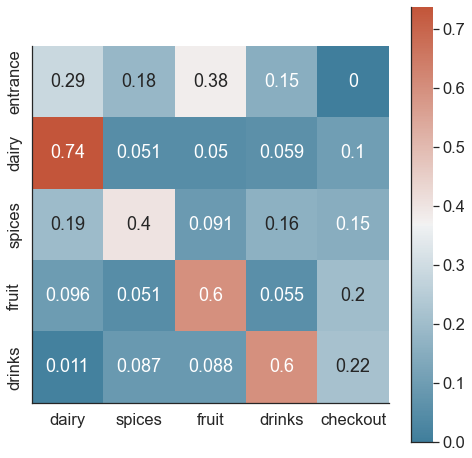

In [32]:
plot_heatmap(df_markov.iloc[:-1, 1:])

## Conduct a first simple MCMC

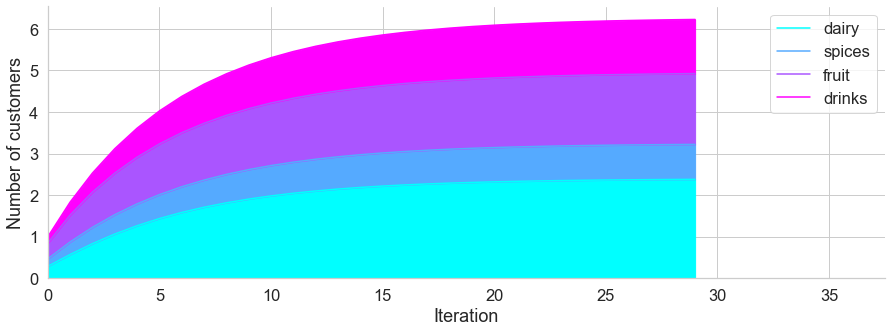

In [33]:
# Markov simulation - a new customer every minute...

# State vector at the beginning of the simualtion
# Remember: col_names = ['entrance', 'dairy', 'spices', 'fruit', 'drinks', 'checkout']
state_now = np.array([0, 0, 0, 0, 0, 0])
state_list = []

# Defining the transition matrix (state to same state transition possible)
df_markov, matrix_trs, locations = get_matrix_trs2(df)

# Markov simulation using derived transition matrix
n = 30
for i in range(n):
    # Every iteration one customer enters the supermarket
    state_now[0] += 1
    
    # Conduct state transition modelling
    state_nxt = state_now.dot(matrix_trs)
    state_list.append(state_nxt)
    
    # Plot area chart states (without checkout/new)
    area = pd.DataFrame([i[1:-1] for i in state_list[:]])
    ax = area.plot.area(cmap='cool', xlabel='Iteration', ylabel='Number of customers')
    ax.legend(['dairy', 'spices', 'fruit', 'drinks'])
    ax.set_xlim(0, 5/4 * n)
    sns.despine()
    plt.show()
    
    # Update state
    state_now = state_nxt
    
    # Wait and clear plot
    time.sleep(0.2)
    clear_output(wait=True)

## MCMC with a customer and supermarket classes

### Create customer class

In [34]:
class Customer:
    """
    A single customer that moves through the supermarket.
    """
    
    def __init__(self, name, budget=100):
        self.name = name
        self.budget = budget
        self.location = None
        self.locations = None
        self.matrix_trs = None
    
    def __repr__(self):
        return f'Customer {self.name} in {self.location}'
    
    def next_location(self):
        """
        Propagates the customer to the next state based on markov transition matrix.
        """
        # Save previous state
        location_prv = self.location
        
        # Determine state vector
        location_vec = (self.locations==self.location).astype(int)
        
        # Use transition matrix to select next state based on probabilities
        self.location = np.random.choice(self.locations, size=1, p=location_vec.dot(self.matrix_trs))[0]
        
        # Print message
        if self.location != location_prv:
            return f'{self.name} moved from {location_prv} to {self.location}'
        
    def move_to_checkout(self):
        """
        Customers can be moved to checkout if supermarket is closed
        """
        location_prv = self.location
        self.location = 'checkout'
        # Print message
        return f'{self.name} moved from {location_prv} to {self.location}'
        
    def is_active(self):
        """
        Returns true if customer has not yet checked-out.
        """
        return self.location != 'checkout'

### Create supermarket class

In [35]:
class Supermarket:
    """
    A supermarket, which has customers, who move through it.
    """
    
    def __init__(self, locations, matrix_trs):
        self.customers = []
        self.locations = locations
        self.matrix_trs = matrix_trs
        
    def add(self, customer):
        # Add customer to list
        self.customers.append(customer)
        # Pass locations and transition matrix to customer; set initial location to 'entrance'
        customer.locations = self.locations
        customer.location = 'entrance'
        customer.matrix_trs = self.matrix_trs
        
    def active_customers(self):
        return [customer for customer in self.customers if customer.is_active()]
    
    def move_customers(self):
        for customer in self.active_customers():
            customer.next_location()
            
    def checkout_all(self):
        for customer in self.active_customers():
            customer.move_to_checkout()

### Perform MCMC with created classes

In [36]:
# Perform MCMC and save output to csv

# Define start time and time_steps for simulation
start_time = pd.to_datetime('2019, 9, 2, 7:00')
end_time = pd.to_datetime('2019, 9, 2, 22:00')
delta_time = datetime.timedelta(minutes=1)

# Define transition matrix for supermarket
df_markov, matrix_trs, locations = get_matrix_trs2(df) #includes transition from state to same state

# Initiate supermarket
supermarket = Supermarket(locations, matrix_trs)

# Define when new customers arrive - here done via dictionary using original data (granularity can be adjusted)
customer_arrivals = df[df['step']==1].groupby(df['timestamp'].dt.floor('1Min'))[['customer_no']].count()
customer_arrivals_dict = {}
for time, count in customer_arrivals.itertuples():
    customer_arrivals_dict[time] = count    

# Start actual MCMC
result = []
customers= {}
current_time = start_time

while current_time <= end_time:
    
    # Create customer and add to supermarket
    new_customers = customer_arrivals_dict.get(current_time, 0)
    for i in range(new_customers):
        name = Faker().name()
        cus_id = f'customer_{current_time}_{i}'
        customers[cus_id] = Customer(name)
        supermarket.add(customers[cus_id])
    
    # Move all active customers to next location and print changes
    print(f'\nTime: {current_time}:')
    if current_time != end_time:
        # Move all active customers to next location and print changes
        supermarket.move_customers()
    else:
        # If supermarket closes, checkout all remaining active customers
        supermarket.checkout_all()
    
    # Save results
    for customer in supermarket.active_customers():
        result.append([current_time, customer.name, customer.location])
        
    # Add intervall to current time
    current_time += delta_time
    
    # Clear plot
    clear_output(wait=True)
    
# Save results of MCMC as csv
df_result = pd.DataFrame(result, columns=['timestamp', 'customer', 'location']).set_index('timestamp')
df_result.to_csv('result_mcmc.csv')


Time: 2019-09-02 22:00:00:


In [37]:
# Checking the head of the resulting output file
!head ./*.csv

timestamp,customer,location
2019-09-02 07:03:00,Christina Boyer,fruit
2019-09-02 07:03:00,Michele Thomas,fruit
2019-09-02 07:04:00,Christina Boyer,fruit
2019-09-02 07:04:00,Michele Thomas,fruit
2019-09-02 07:04:00,Stephanie Rodriguez,fruit
2019-09-02 07:04:00,Jesus Williams,fruit
2019-09-02 07:04:00,Tracy Moore,spices
2019-09-02 07:04:00,Gregory Wiggins,fruit
2019-09-02 07:04:00,Stephanie Moore,fruit


In [38]:
# Number of customers in simualtion
len(customers.keys())

1447

# Visualization with pygame

In [39]:
import pygame
pygame.init()
import math
from queue import PriorityQueue
from time import sleep

#########################
### Class definitions ###
#########################

class Spot:
    """
    A spot on the pygame display - basis for drawing customers and supermarket.
    """
    def __init__(self, row, col, width, total_rows):
        self.row = row
        self.col = col
        self.x = row * width
        self.y = col * width
        self.color = WHITE
        self.width = width
        self.total_rows = total_rows
        self.visits = 0
        
    def __repr__(self):
        return f'Spot with x-coord = {self.x} and y-coord = {self.y}'
    
    def get_pos(self):
        """
        Returns position of a specific spot
        """
        return self.row, self.col
    
    def get_heated_color(self):
        """
        Defines color depending on visits to enable drawing of a heatmap. 
        Gradient will be defined based on 3 anchor point colors:
        0 counts = WHITE
        SP_1 counts = MEDIUM_HEAT
        SP_2 counts = HIGH_HEAT
        """
        MEDIUM_HEAT = np.array([242, 246, 111])
        HIGH_HEAT = np.array([225, 97, 71])
        SET_POINTS = (50, 200)
        SP_1, SP_2 = SET_POINTS
        
        color = np.array([0, 0, 0])
        k = self.visits
        if k <= SP_1:
            color = WHITE + k / (SP_1 - 0) * (MEDIUM_HEAT - WHITE)
        elif k <= SP_2:
            color = MEDIUM_HEAT + (k - SP_1) / (SP_2 - SP_1) * (HIGH_HEAT - MEDIUM_HEAT)
        else:
            color = HIGH_HEAT
        return tuple(color)
    
    def is_barrier(self):
        """
        Returns True if spot is a barrier
        """
        return self.color == BLACK
    
    def set_free(self):
        """
        Marks a code as free (no barrier, not occupied)
        """
        self.color = self.get_heated_color()

    def set_occupied(self):
        """
        Marks a spot as occupied by a customer
        """
        self.color = BLUE
        self.visits += 1
    
    def is_occupied(self):
        """
        Returns True, if spot is occupied by a customer
        """
        return self.color == BLUE

    def make_barrier(self):
        """
        Returns True, if spot is currently a barrier
        """
        self.color = BLACK
        
    def draw(self, win):
        """
        Draw a cpot in the grid as rectangle using the currently defined color
        """
        pygame.draw.rect(win, self.color, (self.x, self.y, self.width, self.width))
        

class Grid:
    
    def __init__(self, rows, width):
        self.rows = rows
        self.width = width
        
        # Initialize grid with spots
        grid = []
        gap = width // rows
        for i in range(rows):
            grid.append([])
            for j in range(rows):
                spot = Spot(i, j, gap, rows)
                grid[i].append(spot)
        
        self.grid = grid
        
    def __repr__(self):
        return f'Grid with {self.rows} rows and a width of {self.width}.'
        
    def draw_gridlines(self, win):
        """
        Display gridlines in the pygame window.
        """
        gap = self.width // self.rows
        # Horizontal lines
        for i in range(self.rows):
            pygame.draw.line(win, GREY, (0, i * gap), (self.width, i * gap))
        # Vertical lines
        for j in range(self.rows):
            pygame.draw.line(win, GREY, (j * gap, 0), (j * gap, self.width))
            
    def make_spots_black(self, coords):
        """
        Make selected spots black.
        """
        for x, y in coords:
            spot = self.grid[x][y]
            spot.color = BLACK
            
    def update_spots(self, win):
        """
        Draw spots with defined color in the grid.
        """
        for row in self.grid:
            for spot in row:
                spot.draw(win)
                
    def draw_line(self, start, end):
        """
        Draws a straight line based on given start and end cooridnates.
        """
        if start[0] == end[0]:
            x = start[0]
            for y in range(start[1], end[1] + 1):
                spot = self.grid[x][y]
                spot.make_barrier()
        elif start[1] == end[1]:
            y = start[1]
            for x in range(start[0], end[0] + 1):
                spot = self.grid[x][y]
                spot.make_barrier()
        else:
            'Oh oh - coordinates do not depict a straight line!'
       
    def draw_rect(self, left_top_corner, width_in_spots, height_in_spots):
        """
        Draws a rectangle based on coordinates of left-top-corner and width in spots
        """
        pos = np.array(left_top_corner)
        delta_x = np.array([width_in_spots - 1, 0])
        delta_y = np.array([0, height_in_spots - 1])
        
        # Top horizontal line
        start = pos
        end = pos + delta_x
        self.draw_line(start, end)
        
        # Bottom horizontal line
        start = pos + delta_y
        end = pos + delta_x + delta_y
        self.draw_line(start, end)
        
        # Left vertical line
        start = pos
        end = pos + delta_y
        self.draw_line(start, end)
        
        # Right vertical line
        start = pos + delta_x
        end = pos + delta_x + delta_y
        self.draw_line(start, end)
        
        
class CustomerPG(Customer):
    """
    Builds upon the customer class. Adds attributes and functions for visualization
    """
    # Some constants for this class
    
    def __init__(self, name, budget=100):
        super().__init__(name, budget)
        self.x = None
        self.y = None
        self.locations_dict = {}
        self.target = None
        self.counter = WAIT_TIME_IN_FRAMES

    def occupy(self, grid):
        """
        Enables customer to occupy a certain spot in the grid
        """
        spot = grid.grid[self.x][self.y]
        spot.set_occupied()
        
    def release(self, grid):
        """
        Enables customer to release the spot it has occupied before in the grid
        """
        spot = grid.grid[self.x][self.y]
        spot.set_free()
    
    def move(self, grid, x_vel, y_vel):
        """
        Enables customer to move in the grid, i.e. from spot to spot
        """
        self.release(grid)
        self.x += x_vel
        self.y += y_vel
        self.occupy(grid)
        
    def update_target(self):
        """
        Selects a target spot based on the currently selected location
        """
        target_x = np.random.choice(self.locations_dict[self.location][0], size=1)[0]
        target_y = np.random.choice(self.locations_dict[self.location][1], size=1)[0]
        self.target = (target_x, target_y)
        
    def is_active(self):
        return self.counter != -999
    
    def tick(self, grid):
        """
        Main function for simulation/visualization, takes care of customer movement and state changes
        """
        # Customer is at right location
        if (self.x, self.y) == self.target:
            # If customer has checked out, leave supermarket
            if self.location == 'checkout':
                if self.counter >= WAIT_TIME_IN_FRAMES:
                    self.release(grid)
                    self.counter = -999
                else:
                    self.counter += 1
            # if not, customers waits and searches for staff
            elif self.counter >= WAIT_TIME_IN_FRAMES:
                self.next_location()
                self.update_target()
                self.counter = 0
            else:
                self.counter += 1
        # Customer moves to next location
        else:
            t_x, t_y = self.target
            # Move into correct x-direction if no boundary - else up or down
            if self.x < t_x:
                if grid.grid[self.x + 1][self.y].is_barrier():
                    if self.y in self.locations_dict['entrance'][1]:
                        self.move(grid, 0, -1) # Step into supermarket first
                    else:
                        self.move(grid, 0, 1) 
                else:
                    self.move(grid, 1, 0)
            elif self.x > t_x:
                if grid.grid[self.x - 1][self.y].is_barrier():
                    if self.location == 'checkout':
                        self.move(grid, 0, 1) # To checkout, always move down
                    else:
                        self.move(grid, 0, -1) 
                else:
                    self.move(grid, -1, 0)
            # Once x value is equal with target, go into direction of correct y-value
            elif self.y < t_y:
                self.move(grid, 0, 1)
            elif self.y > t_y:
                self.move(grid, 0, -1)
            
        
class SupermarketPG(Supermarket):
    """
    Builds upon the supermarket class. Adds attributes and functions for visualization
    """
    # Some constants for this class
    
    def __init__(self, locations, location_coords, matrix_trs):
        super().__init__(locations, matrix_trs)
        self.locations_dict = {}
        for location, coords in zip(locations, location_coords):
            self.locations_dict[location] = coords

    def add(self, customer, grid):
        """
        Adds one customer to the supermarket and takes care of initializing all related variables
        """
        self.customers.append(customer)
        # Pass locations and transition matrix to customer; set initial location to 'entrance'
        customer.locations = self.locations
        customer.location = 'entrance'
        customer.locations_dict = self.locations_dict
        customer.x = np.random.choice(self.locations_dict['entrance'][0], size=1)[0]
        customer.y = np.random.choice(self.locations_dict['entrance'][1], size=1)[0]
        customer.target = (customer.x, customer.y)
        customer.matrix_trs = self.matrix_trs
        customer.occupy(grid)
        
    def tick(self, grid):
        """
        Main function for simulation/visualization, steers movement of customers
        """
        for customer in self.active_customers():
            customer.tick(grid)
              
########################
### Global functions ###
########################

def draw(win, grid, rows, width):
    """
    Main drawing function - updates all spots
    """
    grid.update_spots(win)
    #grid.draw_gridlines(win)

def get_clicked_pos(pos, rows, width):
    gap = width // rows
    y, x = pos
    
    row = y // gap
    col = x // gap

    return row, col

def draw_supermarket(grid):
    """
    Draws the supermarket using the grid_draw methods
    """
    # Draw outer boaundary
    grid.draw_rect([14, 14], 22, 22)
    
    # Draw "locations" within supermarket (dairy, spices, fruit, drinks)
    grid.draw_rect([14, 17], 2, 10)
    grid.draw_rect([19, 17], 2, 10)
    grid.draw_rect([24, 17], 2, 10)
    grid.draw_rect([29, 17], 2, 10)
    grid.draw_rect([34, 17], 2, 10)
    
    # Draw check-out area 
    grid.draw_rect([16, 30], 2, 6)
    grid.grid[18][35].set_free()
    grid.grid[19][35].set_free()

    grid.grid[29][35].set_free()
    grid.grid[30][35].set_free()

def create_new_customer(supermarket, grid, current_time):
    """
    This function creates new customers,
    based on observed frequency in the data (provided via dictionary),
    and adds these to the supermarket.
    """
    new_customers = customer_arrivals_dict.get(current_time, 0)
    for i in range(new_customers):
        name = Faker().name()
        cus_id = f'customer_{current_time}_{i}'
        customers[cus_id] = CustomerPG(name)
        supermarket.add(customers[cus_id], grid)
        
def capture_image(win, img_number):
    """
    Saves an area (rectangle) of the window as an image
    for gif creaation - centred on the suprmarket.
    """
    name = f"../pygame_supermarket_simulation/frame_{img_number}.png"
    rect = pygame.Rect(100, 100, 400, 400)
    sub = win.subsurface(rect)
    pygame.image.save(sub, name)
    

####################
### Main program ###
####################

def main(win, rows, width):
    """
    Comprises MCMC simulation with visualization via pygame.
    """
    # Title of simulation
    pygame.display.set_caption("Supermarket simulation")
    
    # Clock for updating the window
    clock = pygame.time.Clock()
    
    # Create instance of grid class (with spot instances inside)
    grid = Grid(rows, width)
    
    # Define and draw supermarket (coordinates refer to spots not actual x/y-coordinates)
    df_markov, matrix_trs, locations = get_matrix_trs2(df) #includes transition from state to same state
    location_coords = [
        [[29, 30], [35]], # entrance
        [[16, 18], [17, 18, 19, 20, 21, 22, 23, 24, 25, 26]], # dairy
        [[21, 23], [17, 18, 19, 20, 21, 22, 23, 24, 25, 26]], # spices
        [[26, 28], [17, 18, 19, 20, 21, 22, 23, 24, 25, 26]], # fruit
        [[31, 33], [17, 18, 19, 20, 21, 22, 23, 24, 25, 26]], # drinks
        [[18], [33]] # checkout
    ]
    supermarket = SupermarketPG(locations, location_coords, matrix_trs)
    draw_supermarket(grid)
    
    # Draw labels 
    # -> for locations in supermarket
    font_loc = pygame.font.SysFont('Verdana', 12, italic=True)
    
    img_entrance = font_loc.render('entrance', True, GREY)
    img_dairy = font_loc.render('dairy', True, GREY)
    img_spices = font_loc.render('spices', True, GREY)
    img_fruit = font_loc.render('fruit', True, GREY)
    img_drinks = font_loc.render('drinks', True, GREY)
    img_checkout = font_loc.render('checkout', True, GREY)
    
    # -> For timestamp
    font_time = pygame.font.SysFont('Verdana', 14)
    img_timestamp = font_time.render(f'Time: {START_TIME}', True, BLUE)
    
    # Get customer arrival data from observed data and store in dictionary
    customer_arrivals = df[df['step']==1].groupby(df['timestamp'].dt.floor('1Min'))[['customer_no']].count()
    customer_arrivals
    
    customer_arrivals_dict = {}
    for time, count in customer_arrivals.itertuples():
        customer_arrivals_dict[time] = count
    customer_arrivals_dict

    # Run simulation
    record = False
    current_time = START_TIME
    run_count = 0
    run = True
    while run:

        # Check whether user has interacted 
        for event in pygame.event.get():
            # -> Enables closing the game when pressing exit button of window
            if event.type == pygame.QUIT:
                print("Player has clicked the quit-button")
                run = False
            
            # -> Get pressed keyboard buttons (not used yet)
            elif event.type == pygame.KEYDOWN:
                
                # Quit the game by pressing 'q' on keyboard
                if event.key == pygame.K_q:
                    print("Simulation stopped by user ('q' pressed on keyboard)")
                    run = False
                          
                # Record images by pressing 'r' on keyboard
                if event.key == pygame.K_r:
                    print("Images are recorded for gif creation. Press 'r' again to stop recording.")
                    record = not record
                    # Record function to be implemented...
                          
                # Pause the simualtion by pressing 'space' on keyboard          
                if event.key == pygame.K_SPACE:
                    print("Simualtion is paused - press 'space' again to continue.")
                    # Pause function to be implemented...
                
            # -> Get clicked mouse buttons (not used yet)
            elif event.type == pygame.MOUSEBUTTONDOWN:
                print("Player has pressed a mouse button")
                
        # Implement game logic
        
        # -> Control new customer arrival
        if run_count % ONE_MIN_IN_FRAMES == 0: 
            create_new_customer(supermarket, grid, current_time)
        
        # -> Perfom main simualtion steps (movement of customers and state change)
        supermarket.tick(grid)
        
        # Delete all drawings (game/area/players)
        win.fill(WHITE)
        
        # Draw game/area/palyers + labels for locations and time
        draw(win, grid, rows, width)
        
        win.blit(img_entrance, (335, 435)) # entrance label
        win.blit(img_dairy, (196, 185)) # dairy label
        win.blit(img_spices, (252, 185)) # spices label
        win.blit(img_fruit, (315, 185)) # fruit label
        win.blit(img_drinks, (371, 185)) # drinks label
        win.blit(img_checkout, (220, 380)) # checkout label
        
        win.blit(img_timestamp, (170, 140)) # checkout label
        
        # Update the whole screen
        pygame.display.flip()
        
        if record and (run_count <= record_start + 5 * ONE_MIN_IN_FRAMES):
            img_number = run_count - record_start - 1
            capture_image(win, img_number)
        else:
            if record == True:
                print("Recording has stopped automatically")
                record = False
            record_start = run_count
        
        # Define refresh intervalls/timing (=times per second)
        clock.tick(FPS)
        
        run_count +=1
        if run_count % ONE_MIN_IN_FRAMES == 0:
            current_time += ONE_MIN
            img_timestamp = font_time.render(f'Time: {current_time}', True, BLUE)

    pygame.quit()
    
    
#######################
### MCMC simulation ###
#######################

# Dimensions of the pygamewindow
ROWS = 50
WIDTH = 600
WIN = pygame.display.set_mode((WIDTH, WIDTH))

# Colors in RGB format
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
BLUE = (0, 0, 255)
GREY = (128, 128, 128)

# Define start time and time_steps for simulation
START_TIME = pd.to_datetime('2019, 9, 2, 7:00')
END_TIME = pd.to_datetime('2019, 9, 2, 22:00')
ONE_MIN = datetime.timedelta(minutes=1)

# Define time intervals and frames per second for simulation, i.e. customer moves FPS times per second
FPS = 60 
ONE_MIN_IN_FRAMES = 60 # == FPS, i.e. 1 sec in real time
WAIT_TIME_IN_FRAMES = 40 # i.e., customers stay at a location for 2/3 seconds (WAIT_TIME_IN_FRAMES / FPS)

# Start main program
main(WIN, ROWS, WIDTH)

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
Player has clicked the quit-button


In [40]:
# Create a gif of the supermarket simulation (images recorded via pressing 'r' during simualtion)
import imageio
images = []
for i in range(4 * ONE_MIN_IN_FRAMES):
    filename = f'../pygame_supermarket_simulation/frame_{i}.png'
    images.append(imageio.imread(filename))
    
imageio.mimsave('pygame_supermarket_simulation.gif', images, fps = 20)

<img src="./pygame_supermarket_simulation.gif" width="600" align="left">